In [4]:
import cv2
import numpy as np
 
# from PIL import Image
# img = Image.open("goat.jpg")
# width, height = img.size
# bg = Image.open("background.jpg")
# bg = bg.resize((width, height))
# mask = Image.open("mask.png")
 
# img = img.convert('RGBA')
# bg = bg.convert('RGBA')
 
# img = Image.composite(img, bg, mask)
# img.show()
# img.save("blend.png")


# def combine_two_color_images_with_anchor(image1, image2, anchor_y, anchor_x):
#     foreground, background = img1.copy(), img2.copy()
#     # Check if the foreground is inbound with the new coordinates and raise an error if out of bounds
#     background_height = background.shape[1]
#     background_width = background.shape[1]
#     foreground_height = foreground.shape[0]
#     foreground_width = foreground.shape[1]
#     if foreground_height+anchor_y > background_height or foreground_width+anchor_x > background_width:
#         raise ValueError("The foreground image exceeds the background boundaries at this location")

#     alpha =0.5

#     # do composite at specified location
#     start_y = anchor_y
#     start_x = anchor_x
#     end_y = anchor_y+foreground_height
#     end_x = anchor_x+foreground_width
#     blended_portion = cv.addWeighted(foreground,
#                 alpha,
#                 background[start_y:end_y, start_x:end_x,:],
#                 1 - alpha,
#                 0,
#                 background)
#     background[start_y:end_y, start_x:end_x,:] = blended_portion
#     cv.imshow('composited image', background)

#     cv.waitKey(10000)

# def main ():
#     img = Image.open("goat.jpg")
#     back= Image.open("background.jpg")
#     combine_two_color_images_with_anchor(img,back,100,100)
   
   
  


In [5]:
# Standard imports
import cv2
import numpy as np 
 
# Read images
src = cv2.imread("airplane.jpg")
dst = cv2.imread("sky.jpg")
 
 
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
 
# This is where the CENTER of the airplane will be placed
center = (800,100)
 
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
 
# Save result
cv2.imwrite("opencv-seamless-cloning-example.jpg", output);


AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
img1 = cv2.imread("111.jpg")
img2 = cv2.imread("acne.jpg")




In [7]:
img1.shape

(1438, 1080, 3)

In [8]:
img2.shape

(34, 30, 3)

In [9]:
img1[500:534, 500:530, ::] = img2


In [15]:
import matplotlib.pyplot as plt
from PIL import Image,ImageFilter

In [17]:
crop_img = img1[490:505,490:540]
blur_img = crop_img.filter(ImageFilter.GaussianBlur(radius = 2))
img1.paste(blur_img,(490,490,540,505))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.imshow(img1)

AttributeError: 'numpy.ndarray' object has no attribute 'filter'

TypeError: Image data of dtype object cannot be converted to float

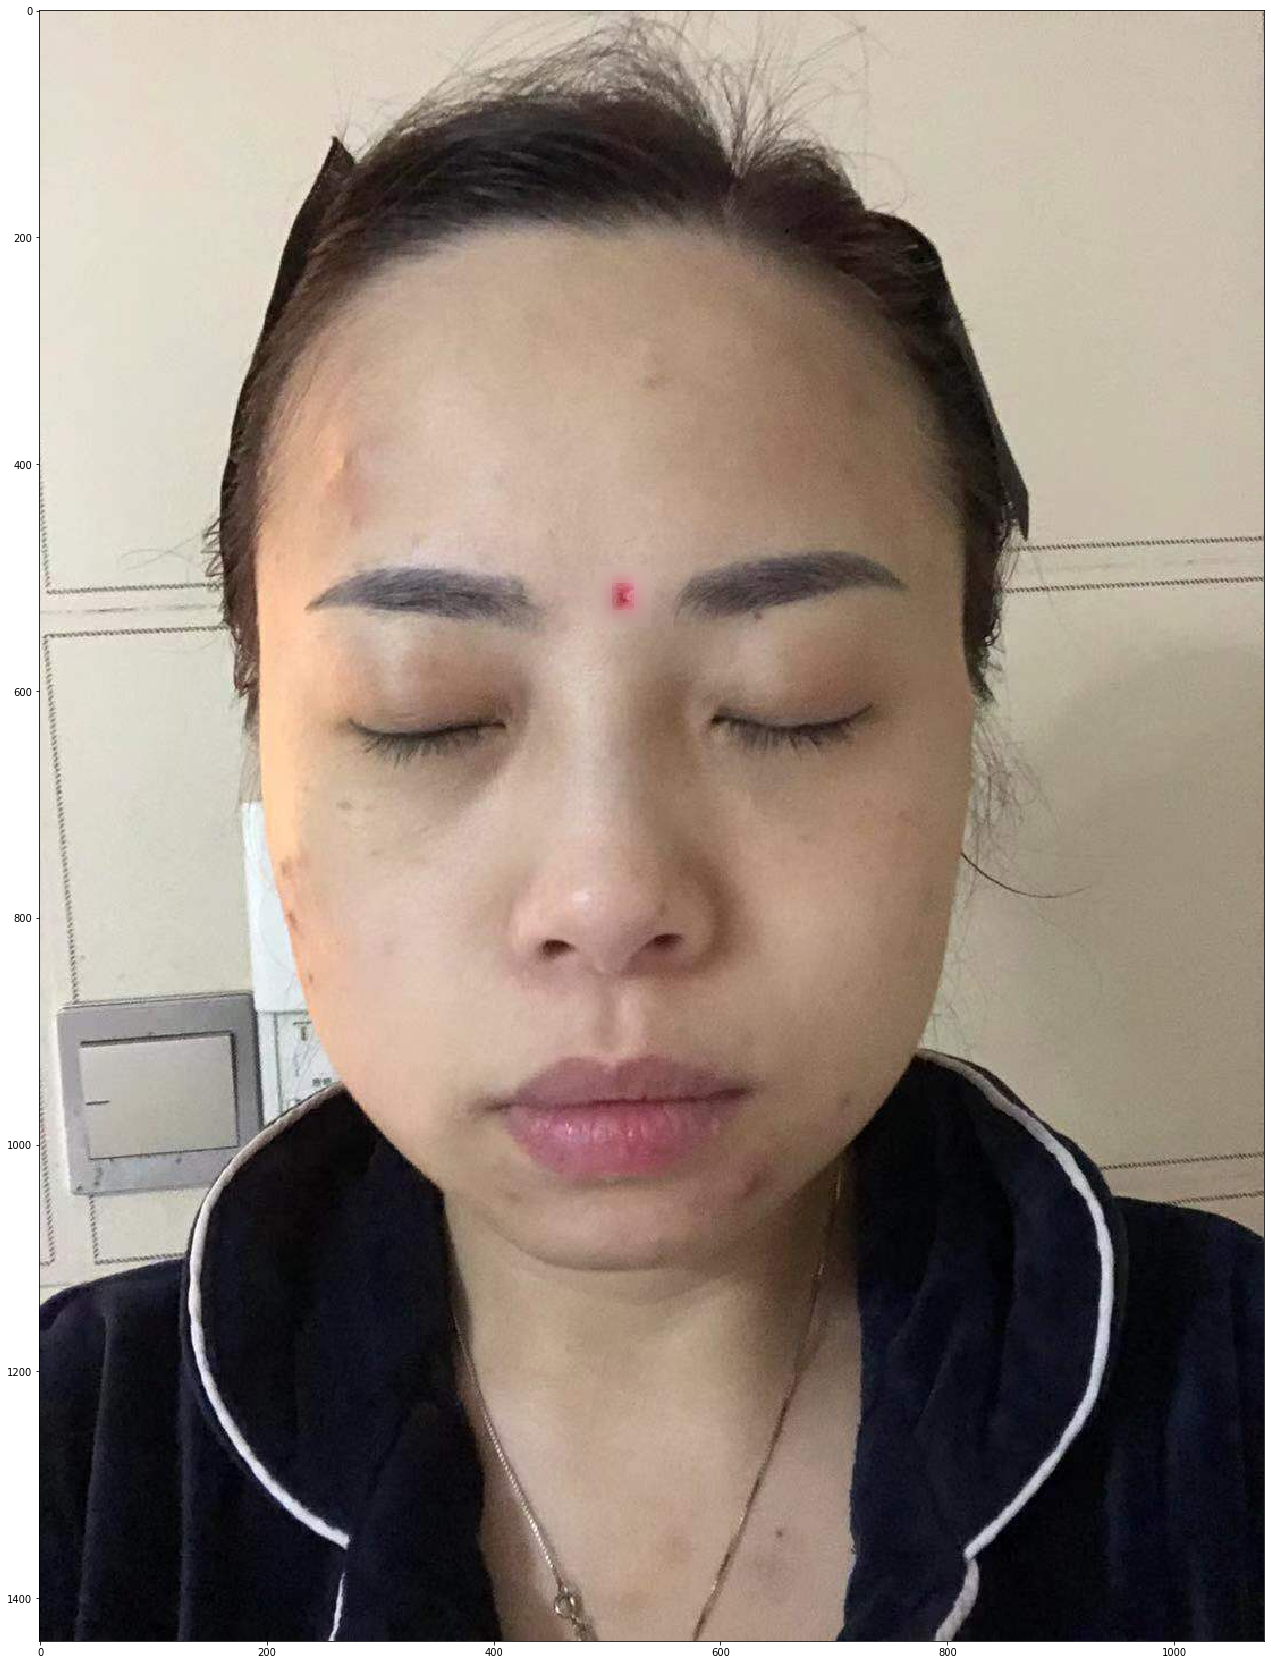

In [28]:
from PIL import Image,ImageFilter
img1 = cv2.imread("111.jpg")
img2 = cv2.imread("acne.jpg")
threshold = cv2.threshold(img2, 160, 175, cv2.THRESH_BINARY_INV)
img1[500:534, 500:530, ::] = img2

#top 
crop_img = img1[490:505,490:540]
blur_img =  cv2.GaussianBlur(crop_img,(25,25),0)
img1[490:505,490:540] = blur_img
#bottom
crop_img = img1[529:544,490:540]
blur_img =  cv2.GaussianBlur(crop_img,(25,25),0)
img1[529:544,490:540] = blur_img
#left
crop_img = img1[490:544,490:505]
blur_img =  cv2.GaussianBlur(crop_img,(25,25),0)
img1[490:544,490:505] = blur_img
#right
crop_img = img1[490:544,525:540]
blur_img =  cv2.GaussianBlur(crop_img,(25,25),0)
img1[490:544,525:540] = blur_img

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.imshow(img1)
plt.imshow(threshold)


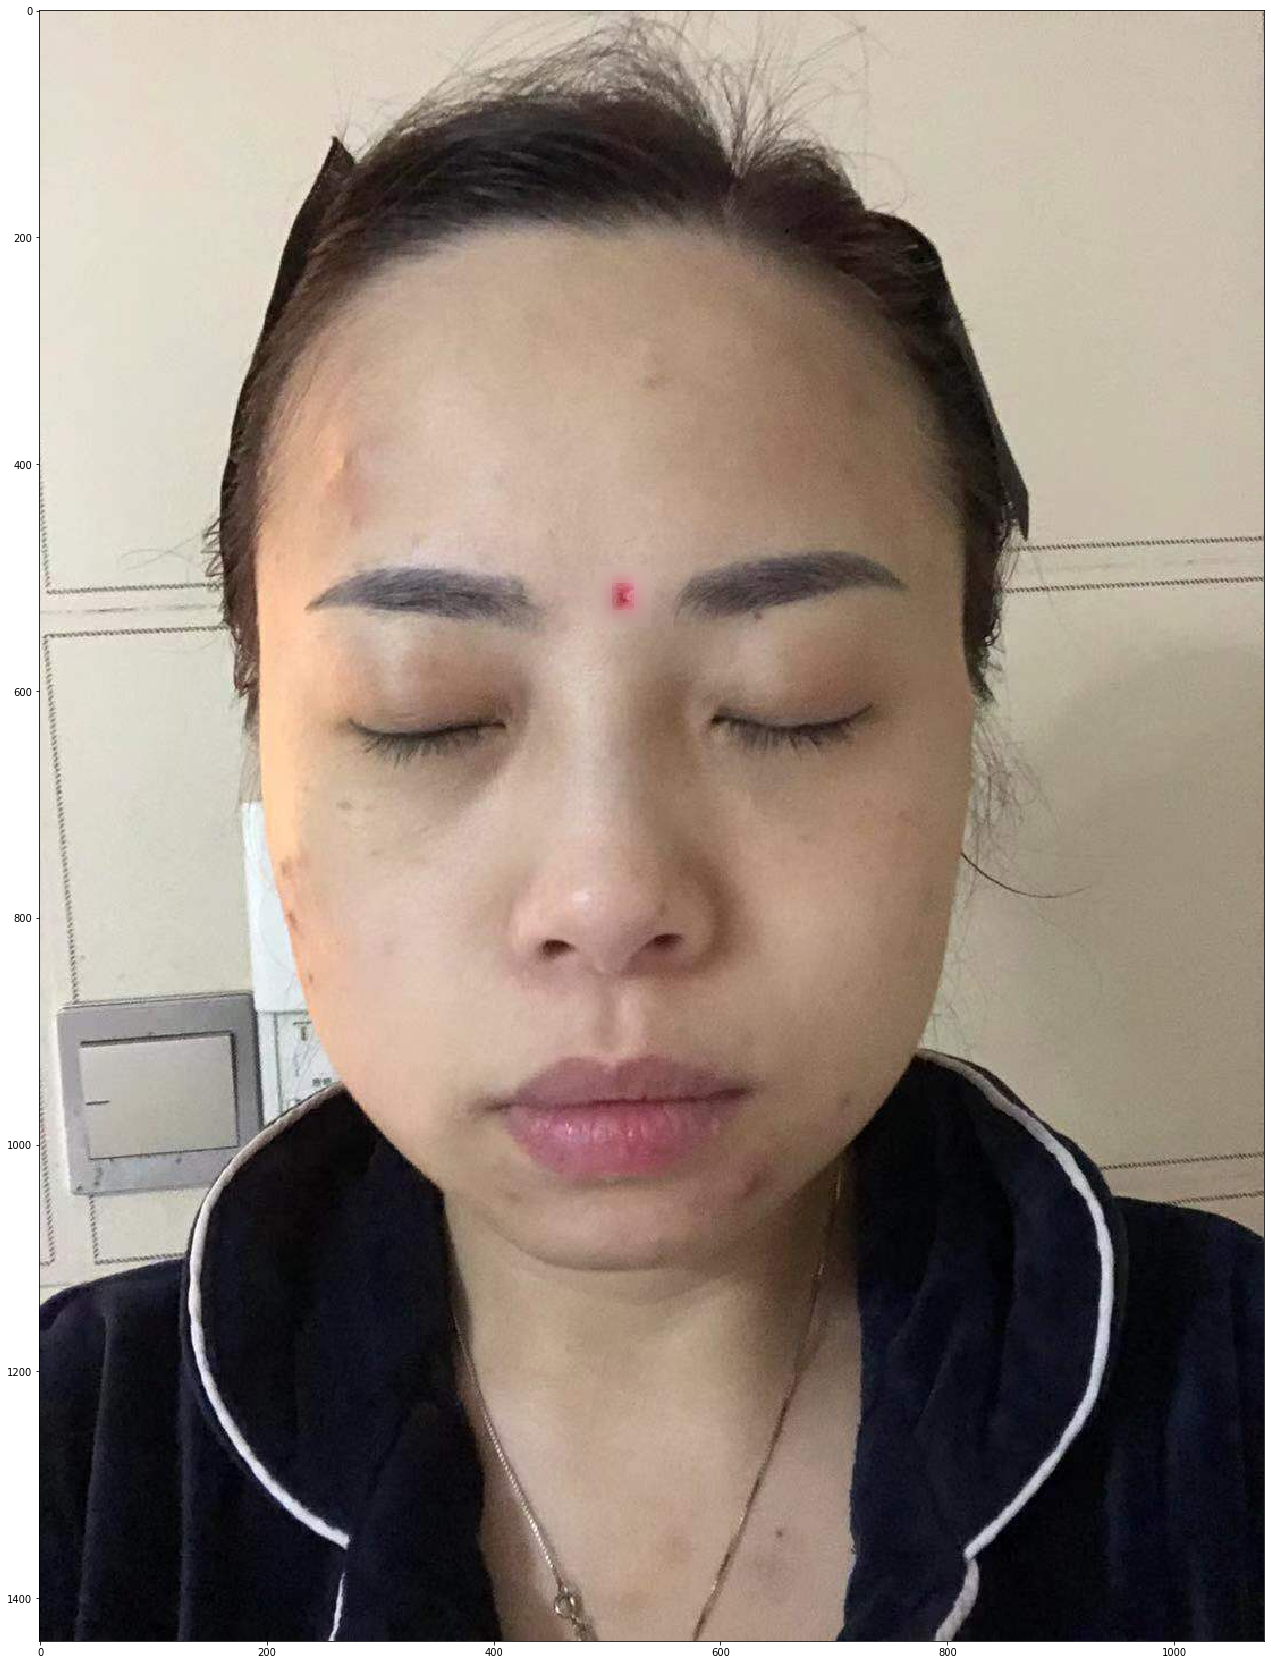

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read images : src image will be cloned into dst
im = cv2.imread("111.jpg")
obj= cv2.imread("acne.jpg")
 
# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)
 
# The location of the center of the src in the dst
width, height, channels = im.shape
center = (500, 500)
 
# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)
normal_clone = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.imshow(normal_clone)
# Write results
# cv2.imwrite("images/opencv-normal-clone-example.jpg", normal_clone)
# cv2.imwrite("images/opencv-mixed-clone-example.jpg", mixed_clone)